In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os


# Part 1: Load Data!

### How we obtained the datasets

In this project, we utilized the Yelp Open Dataset from https://www.yelp.com/dataset/. There are six datasets available: Business, Review, User, Checkin, Tip, Photo. We will only focus on the dataset below: Business, Review, User.

Due to the limitation of Gradescope, we cannot upload the original dataset. If you want to run this notebook, please download it through the above link.

* business.json: Contains business data including location data, attributes, and categories.
* review.json: Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
* user.json: User data including the user's friend mapping and all the metadata associated with the user.
* checkin.json: Checkins on a business.
* tip.json: Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.
* photo.json: Contains photo data including the caption and classification (one of "food", "drink", "menu", "inside" or "outside").

In [ ]:
# Read Json file
file = open("yelp_dataset/yelp_academic_dataset_business.json", 'r')
business = []
for line in file.readlines():
    dic = json.loads(line)
    business.append(dic)
business=pd.DataFrame(business)

file_user = open("yelp_dataset/yelp_academic_dataset_user.json", 'r')
user = []
for line in file_user.readlines():
    dic = json.loads(line)
    user.append(dic)
user=pd.DataFrame(user)

file_review = open("yelp_dataset/yelp_academic_dataset_review.json", 'r')
review = []
for line in file_review.readlines():
    dic = json.loads(line)
    review.append(dic)
review=pd.DataFrame(review)

file_checkin = open("yelp_dataset/yelp_academic_dataset_checkin.json", 'r')
checkin = []
for line in file_checkin.readlines():
    dic = json.loads(line)
    checkin.append(dic)
checkin=pd.DataFrame(checkin)

file_tip = open("yelp_dataset/yelp_academic_dataset_tip.json", 'r')
tip = []
for line in file_tip.readlines():
    dic = json.loads(line)
    tip.append(dic)
tip=pd.DataFrame(tip)

# Part 2: Overview & Processing DataSet

## Part 2.1: User Dataset

### Detailed description of the components in the User data:

* user_id: string, 22 character unique user id, maps to the user in user.json
* name: string, the user's first name
* review_count: integer, the number of reviews they've written
* yelping_since: string, when the user joined Yelp, formatted like YYYY-MM-DD
* friends: array of strings, an array of the user's friend as user_ids
* useful: integer, number of useful votes sent by the user
* funny: integer, number of funny votes sent by the user
* cool: integer, number of cool votes sent by the user
* fans: integer, number of fans the user has
* elite: array of integers, the years the user was elite
* average_stars: float, average rating of all reviews
* compliment_hot: integer, number of hot compliments received by the user
* compliment_more: integer, number of more compliments received by the user
* compliment_profile: integer, number of profile compliments received by the user
* compliment_cute: integer, number of cute compliments received by the user
* compliment_list: integer, number of list compliments received by the user
* compliment_note: integer, number of note compliments received by the user
* compliment_plain: integer, number of plain compliments received by the user
* compliment_cool: integer, number of cool compliments received by the user
* compliment_funny: integer, number of funny compliments received by the user
* compliment_writer: integer, number of writer compliments received by the user
* compliment_photos: integer, number of photo compliments received by the user

In [ ]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
# describe stats of variables
user.describe().T

,count,mean,std,min,25%,50%,75%,max
review_count,1987897.0,23.394409,82.566992,0.0,2.0,5.00,17.00,17473.0
useful,1987897.0,42.296335,641.480597,0.0,0.0,3.00,13.00,206296.0
funny,1987897.0,16.970536,407.803437,0.0,0.0,0.00,2.00,185823.0
cool,1987897.0,23.792914,565.351295,0.0,0.0,0.00,3.00,199878.0
fans,1987897.0,1.465740,18.130753,0.0,0.0,0.00,0.00,12497.0
average_stars,1987897.0,3.630494,1.183337,1.0,3.0,3.88,4.56,5.0
compliment_hot,1987897.0,1.807072,73.601841,0.0,0.0,0.00,0.00,25784.0
compliment_more,1987897.0,0.292263,12.824667,0.0,0.0,0.00,0.00,13501.0
compliment_profile,1987897.0,0.179318,15.155253,0.0,0.0,0.00,0.00,14180.0
compliment_cute,1987897.0,0.133649,11.356823,0.0,0.0,0.00,0.00,13654.0


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [ ]:
# correlation table
cor_user = user.corr()

cor_user

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.000000,0.573369,0.476440,0.494112,0.534190,0.045380,0.262447,0.189265,0.135110,0.120866,0.083666,0.209687,0.267455,0.301840,0.301840,0.333263,0.150500
useful,0.573369,1.000000,0.954307,0.991841,0.643238,0.010973,0.614303,0.426293,0.360189,0.262687,0.203699,0.433614,0.663199,0.735886,0.735886,0.700046,0.546947
funny,0.476440,0.954307,1.000000,0.964872,0.590613,0.007060,0.661326,0.476574,0.409498,0.303063,0.235382,0.441846,0.673973,0.772529,0.772529,0.757250,0.581671
cool,0.494112,0.991841,0.964872,1.000000,0.600828,0.010437,0.630804,0.436831,0.373656,0.270682,0.210513,0.436336,0.671736,0.754928,0.754928,0.707368,0.574912
fans,0.534190,0.643238,0.590613,0.600828,1.000000,0.019413,0.425691,0.257129,0.204807,0.199979,0.121405,0.321864,0.526995,0.484914,0.484914,0.459413,0.296039
average_stars,0.045380,0.010973,0.007060,0.010437,0.019413,1.000000,0.005928,0.004485,0.002745,0.002601,0.001425,0.004902,0.006592,0.007309,0.007309,0.007370,0.003890
compliment_hot,0.262447,0.614303,0.661326,0.630804,0.425691,0.005928,1.000000,0.627411,0.609600,0.546024,0.434293,0.721171,0.682982,0.882702,0.882702,0.802483,0.721363
compliment_more,0.189265,0.426293,0.476574,0.436831,0.257129,0.004485,0.627411,1.000000,0.961363,0.919417,0.931902,0.448723,0.563017,0.666685,0.666685,0.803428,0.825297
compliment_profile,0.135110,0.360189,0.409498,0.373656,0.204807,0.002745,0.609600,0.961363,1.000000,0.890371,0.908688,0.421115,0.558923,0.639783,0.639783,0.774470,0.785596
compliment_cute,0.120866,0.262687,0.303063,0.270682,0.199979,0.002601,0.546024,0.919417,0.890371,1.000000,0.957817,0.357084,0.438571,0.526734,0.526734,0.641525,0.764134


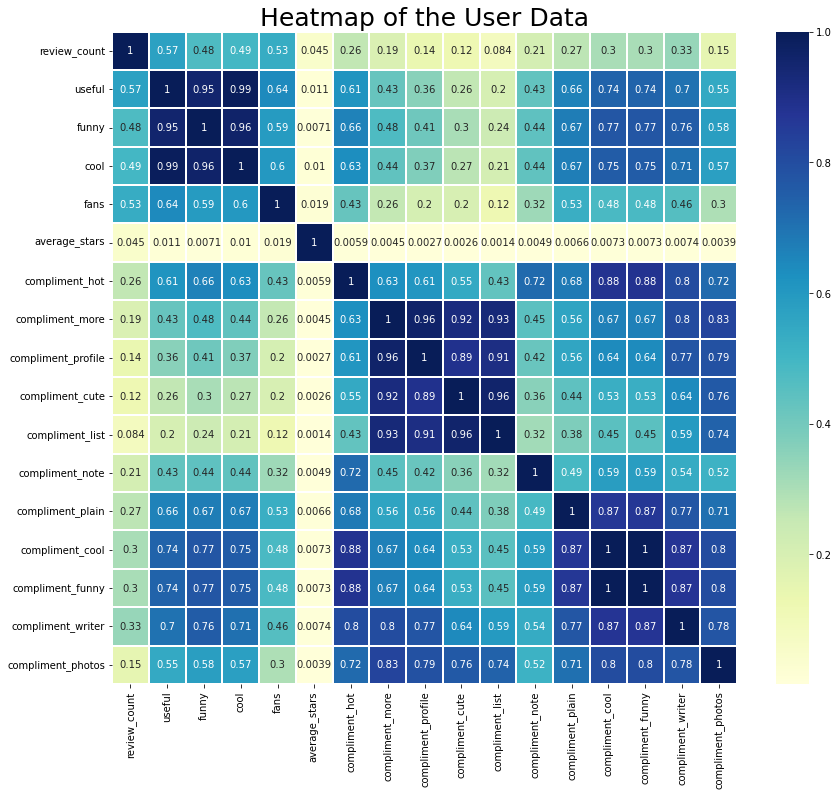

In [ ]:
#create the correlation matrix heat map
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

sns.heatmap(cor_user,linewidths=.1,cmap="YlGnBu", annot=True)
plt.title('Heatmap of the User Data',fontsize=25)

plt.yticks(rotation=0);

<AxesSubplot:>

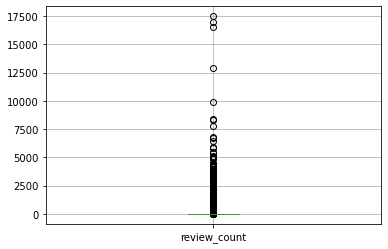

In [ ]:
# box plot of review counts in the user data
user[['review_count']].boxplot()

<AxesSubplot:>

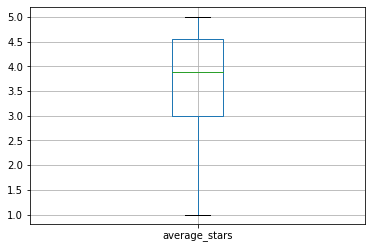

In [ ]:
# box plot of average stars in the user data
user[['average_stars']].boxplot()

In [ ]:
# Check duplicated values
user.duplicated().sum()

0

## Part 2.2: Dataset Business

### Detailed description of the components in the Business data:

* business_id: string, 22 character unique string business id
* name: string, the business's name
* address: string, the full address of the business
* city: string, the city
* state: string, 2 character state code, if applicable
* postal code: string, the postal code
* latitude: float, latitude
* longitude: float, longitude
* stars: float, star rating, rounded to half-stars
* review_count: integer, number of reviews
* is_open: integer, 0 or 1 for closed or open, respectively
* attributes: object, business attributes to values. note: some attribute values might be objects
* categories: an array of strings of business categories
* hours: an object of key day to value hours, hours are using a 24hr clock

In [ ]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,150346.0,36.671150,5.872759,27.555127,32.187293,38.777413,39.954036,53.679197
longitude,150346.0,-89.357339,14.918502,-120.095137,-90.357810,-86.121179,-75.421542,-73.200457
stars,150346.0,3.596724,0.974421,1.000000,3.000000,3.500000,4.500000,5.000000
review_count,150346.0,44.866561,121.120136,5.000000,8.000000,15.000000,37.000000,7568.000000
is_open,150346.0,0.796150,0.402860,0.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
business.info

<bound method DataFrame.info of                    business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  

In [ ]:
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

<AxesSubplot:>

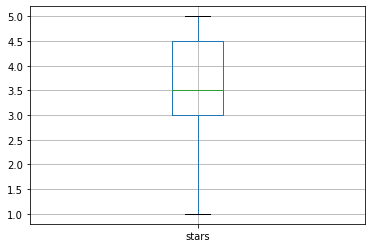

In [ ]:
#to check whether there is some outlier data

business[['stars']].boxplot()

<AxesSubplot:>

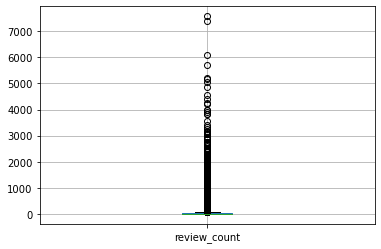

In [ ]:
# box plot of review count
business[['review_count']].boxplot()

In [ ]:
#check null values
business.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [ ]:
# replace null values with 0
business.replace(np.nan,'0',inplace=True)

business.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

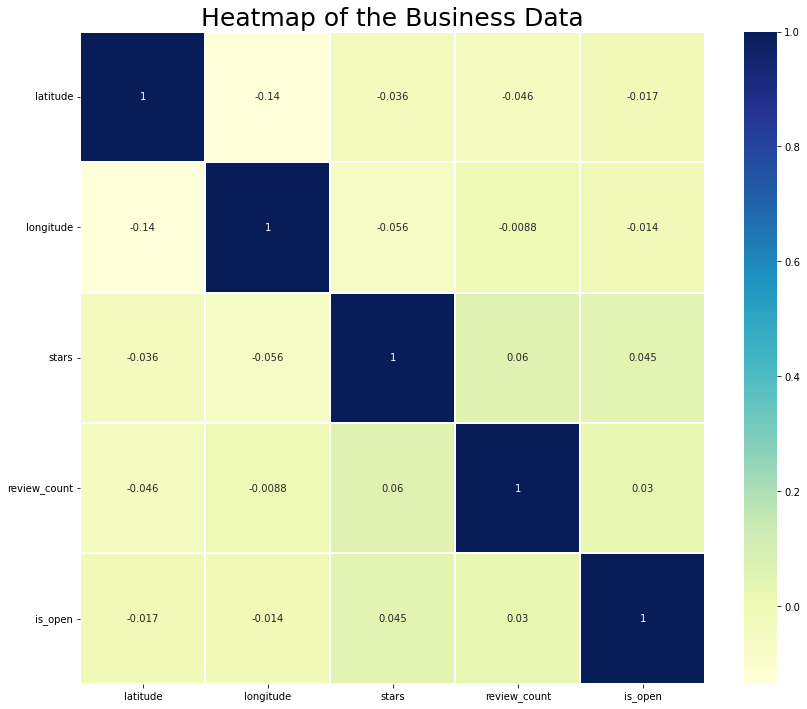

In [ ]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(business.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.title('Heatmap of the Business Data',fontsize=25)

plt.yticks(rotation=0);

## Part 2.3: Dataset Review

### Detailed description of the components in the Review data:

* review_id: string, 22 character unique review id
* user_id: string, 22 character unique user id, maps to the user in user.json
* business_id: string, 22 character business id, maps to business in business.json
* stars: integer, star rating
* date: string, date formatted YYYY-MM-DD
* text: string, the review itself
* useful: integer, number of useful votes received
* funny: integer, number of funny votes received
* cool: integer, number of cool votes received

In [ ]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
review.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,6990280.0,3.748584,1.478705,1.0,3.0,4.0,5.0,5.0
useful,6990280.0,1.184609,3.253767,-1.0,0.0,0.0,1.0,1182.0
funny,6990280.0,0.326560,1.688729,-1.0,0.0,0.0,0.0,792.0
cool,6990280.0,0.498618,2.172460,-1.0,0.0,0.0,0.0,404.0


In [ ]:
review.info

<bound method DataFrame.info of                       review_id                 user_id  \
0        KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1        BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2        saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3        AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4        Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                         ...                     ...   
6990275  H0RIamZu0B0Ei0P4aeh3sQ  qskILQ3k0I_qcCMI-k6_QQ   
6990276  shTPgbgdwTHSuU67mGCmZQ  Zo0th2m8Ez4gLSbHftiQvg   
6990277  YNfNhgZlaaCO5Q_YJR4rEw  mm6E4FbCMwJmb7kPDZ5v2Q   
6990278  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   
6990279  RwcKOdEuLRHNJe4M9-qpqg  6JehEvdoCvZPJ_XIxnzIIw   

                    business_id  stars  useful  funny  cool  \
0        XQfwVwDr-v0ZS3_CbbE5Xw    3.0       0      0     0   
1        7ATYjTIgM3jUlt4UM3IypQ    5.0       1      0     1   
2        YjUWPpI6HXG530lwP-fb2A    3.0       0      0     0   
3      

In [ ]:
review.dtypes

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

<AxesSubplot:>

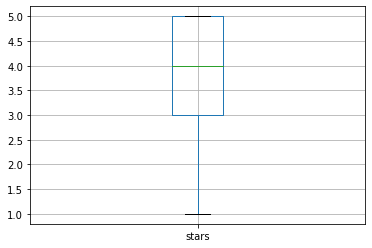

In [ ]:
# box plot of stars
review[['stars']].boxplot()

<AxesSubplot:>

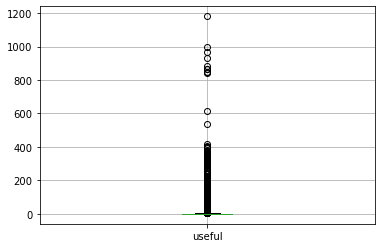

In [ ]:
# box plot of useful
review[['useful']].boxplot()

<AxesSubplot:>

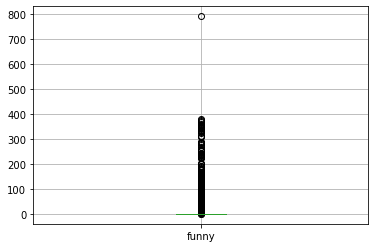

In [ ]:
# box plot of funny
review[['funny']].boxplot()

<AxesSubplot:>

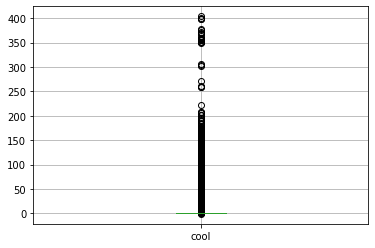

In [ ]:
# box plot of cool
review[['cool']].boxplot()

In [ ]:
# handling missing values for review

review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
# replace null valuew with 0
review.replace(np.nan,'0',inplace=True)

review.isnull().sum()

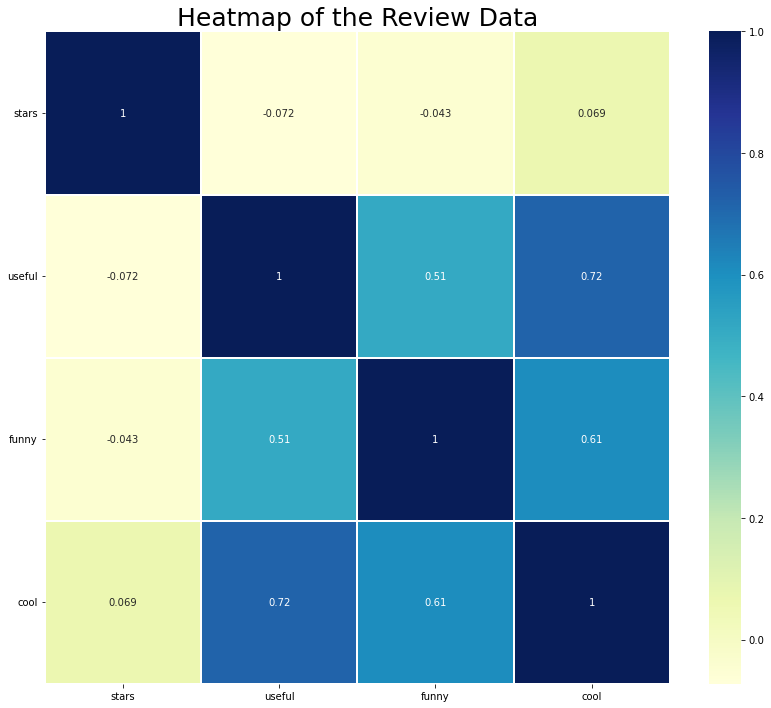

In [ ]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(review.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.title('Heatmap of the Review Data',fontsize=25)

plt.yticks(rotation=0);

## Part 2.4: Dataset Tip

### Detailed description of the components in the Tip data:

* text: string, text of the tip
* date: string, when the tip was written, formatted like YYYY-MM-DD
* compliment_count: integer, how many compliments it has
* business_id: string, 22 character business id, maps to business in business.json
* user_id: string, 22 character unique user id, maps to the user in user.json

In [ ]:
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
tip.describe().T

,count,mean,std,min,25%,50%,75%,max
compliment_count,908915.0,0.012525,0.120763,0.0,0.0,0.0,0.0,6.0


In [ ]:
tip.info

<bound method DataFrame.info of                        user_id             business_id  \
0       AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1       NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2       -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3       FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4       ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   
...                        ...                     ...   
908910  eYodOTF8pkqKPzHkcxZs-Q  3lHTewuKFt5IImbXJoFeDQ   
908911  1uxtQAuJ2T5Xwa_wp7kUnA  OaGf0Dp56ARhQwIDT90w_g   
908912  v48Spe6WEpqehsF2xQADpg  hYnMeAO77RGyTtIzUSKYzQ   
908913  ckqKGM2hl7I9Chp5IpAhkw  s2eyoTuJrcP7I_XyjdhUHQ   
908914  4tF1CWdMxvvwpUIgGsDygA  _cb1Vg1NIWry8UA0jyuXnQ   

                                                     text  \
0                          Avengers time with the ladies.   
1       They have lots of good deserts and tasty cuban...   
2                  It's open even when you think it isn't   
3                          

In [ ]:
tip.dtypes

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

In [ ]:
# handling missing values for tip

tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [ ]:
# replace null value with 0
tip.replace(np.nan,'0',inplace=True)

tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

# Part 3: Merge Data & Sampling & Sampling Distribution

### Data processing steps that we took:

We checked the outliers, null values and duplicated values in the datasets. We also merged the User Data and Review Data (6.99 millions of rows), and then random sampled 30 thousands rows of the data.

In [ ]:
# merging user data with review data on "user_id"
user_review=pd.merge(user, review, on='user_id')

user_review.head()

,user_id,name,review_count,yelping_since,useful_x,funny_x,cool_x,elite,friends,fans,...,compliment_writer,compliment_photos,review_id,business_id,stars,useful_y,funny_y,cool_y,text,date
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,239,180,Egy2a4qZeXGr2aY6KMxxbg,1FURjeGJi_LBXcJQg8eskw,5.0,0,0,1,Remarkable food with beach access for the whol...,2017-05-09 23:21:36
1,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,239,180,01vN0q6aMlFio6HAjLZz7Q,Xq-8-I0U8Artr7d70SjX-g,5.0,30,7,32,I loved everything about this lovely train sta...,2009-05-01 02:00:03
2,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,239,180,hN09L9s9vu0kgUBESDmszQ,2yHl6wl1iFa_Jo_SZcmSuw,4.0,2,1,2,"The classic facade, built over an earlier faci...",2017-05-11 19:17:55
3,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,239,180,Pn2_64tysqn4dUNmu1B8Iw,m-7KjNS6cXpHC3ePfLA36w,2.0,4,0,0,Older Residence Inn with air conditioner probl...,2014-07-30 15:07:43
4,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,239,180,ABd5r1jHjo1vxJXLOewS_A,-OKB11ypR4C8wWlonBFIGw,5.0,1,0,1,I love to go here for the sports book when in ...,2015-04-03 15:37:04


In [ ]:
# number of rows and columns
user_review.shape

(6990247, 30)

In [ ]:
# random sampled 30,000 rows of the merging data
user_review_sample = user_review.sample(n=30000)

In [ ]:
 # random sampled 30,000 rows of the user data
 sample_user = user.sample(n=30000)
# sample_user = np.random.choice(user, size = 30000)

In [ ]:
# random sampled 30,000 rows of the review data
sample_review = review.sample(n=30000)
# sample_review = np.random.choice(review, size = 30000)

In [ ]:
# save sampled data as a csv file
sample_user.to_csv('sample_user_file')

In [ ]:
# save sampled data as a csv file
sample_review.to_csv('sample_review_file')

In [ ]:
# save sampled data as a csv file
user_review.to_csv('merge_user_review_file')

In [ ]:
sample_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
6643547,2tge0RFSKG3_GunBejsxiA,uYIhhbYDDQQVUvRjTaBAkw,MQXOzhLEF-SV4azYDlOLeg,1.0,2,1,0,If I could give this location a 0 I would. My...,2017-11-30 15:17:44
6068358,isR0G1ARcvvgpfzF_XAgLQ,xSlBsTTPtPvwlclBIvAjYw,QA8QLpwf_YT9C2ST5YJ0vw,5.0,0,0,1,"A New Orleans institution. Drinks, service an...",2018-04-26 21:29:43
1416339,3_ed6ju-WMZXqzBXMU4FkA,z6Z8zZQCAEPur8uxRCwGnA,HCHHrf21UAgbxAi8T4Q4Iw,5.0,0,0,0,The wife and I were downtown nashville for som...,2021-09-27 16:27:41
835008,SV6wwOPgmDpL_CxXizJhDg,Bsu8ZE86aZDt3O7Msr3oRw,OiE-MRsu_E5O54crdNGZ1g,5.0,0,3,0,"I don't know, I think the bathrooms are AMAZIN...",2015-07-20 03:01:46
6207090,A78ANYvIjEhF3zrvM2EOmQ,JclJzXVqu7PeBkM6H2vQbw,HEf0QXnhxrcIWxRfAbQ2iA,3.0,3,0,0,Stopped by for a quick curbside outdoor bite d...,2020-07-25 21:46:09


### Limitations of the dataset:

One of the biggest limitations of our data is that the size of the Yelp dataset is huge, especially the User Data (1.99 millions of rows) and the Review Data (6.99 millions of rows). Since it is time consuming to process all the data, we decided to do a random sampling on these datasets. Therefore, there might be some bias on the data that we sampled.

After reducing the size of the datasets, we performed the two-sample Kolmogorov-Smirnov test to check whether the sample data and original data have the same distributions. 

P-value is 0.176, more than 5%, which is the specific significance level. We assume that they are indentical distributions. The histogram also shows they have similar distribution. 

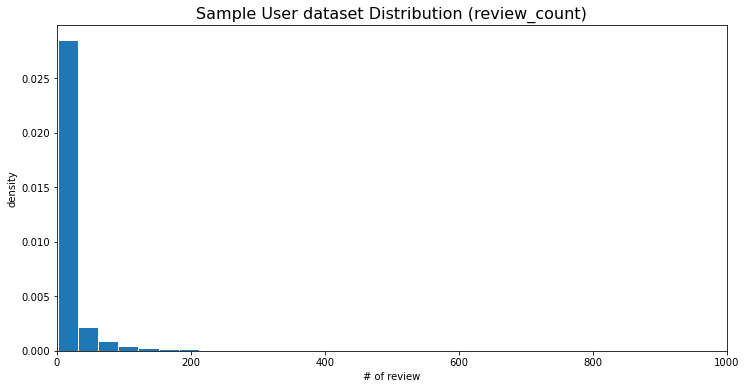

In [ ]:
# check sample distribution

fig, ax = plt.subplots(1,1,figsize=(12,6))

# review_hist = review["review_count"]
user_sample_hist = sample_user["review_count"]
# print(max(user_sample_hist))

# ax = plt.hist(x=review_dist, bins=50)
ax = plt.hist(x=user_sample_hist,bins=100, density = True, ec = 'w')
 
# plt.xlim([0, max(user_sample_hist)])
plt.xlim([0, 1000])
plt.xlabel("# of review")
plt.ylabel("density")
plt.title('Sample User dataset Distribution (review_count)',fontsize=16)
plt.show()

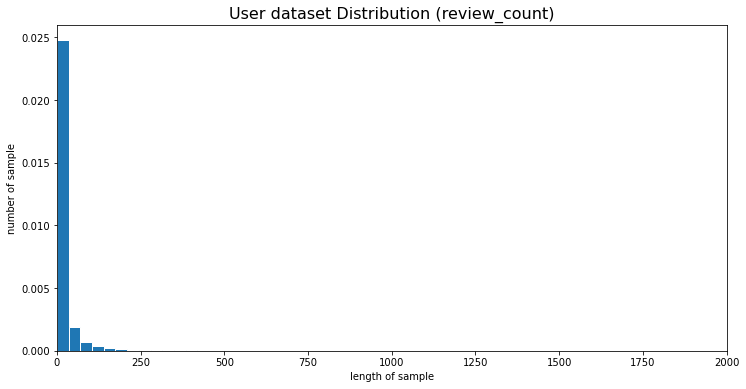

In [ ]:
# check sample distribution

fig, ax = plt.subplots(1,1,figsize=(12,6))

user_hist = user["review_count"]
# user_sample_hist = sample_user["review_count"]
# print(max(user_hist))

ax = plt.hist(x=user_hist, bins=500, density = True,ec = 'w')
# ax = plt.hist(x=user_sample_hist,bins=100, density = True)

# plt.xlim([0, max(user_hist)])
plt.xlim([0, 2000])
plt.xlabel("length of sample")
plt.ylabel("number of sample")
plt.title('User dataset Distribution (review_count)',fontsize=16)
# plt.legend(['train_len','test_len'])
plt.show()

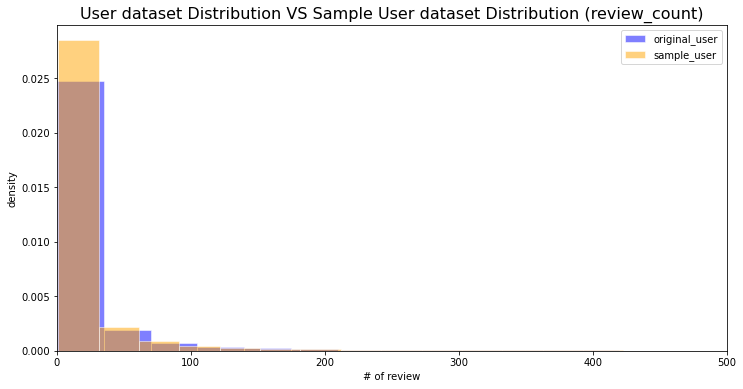

In [ ]:
# check sample distribution using a histogram

fig, ax = plt.subplots(1,1,figsize=(12,6))

user_hist = user["review_count"]
user_sample_hist = sample_user["review_count"]

ax = plt.hist(x=user_hist, bins=500, density = True, color = 'blue', ec = 'w', alpha = 0.5, label = 'original_user')
ax = plt.hist(x=user_sample_hist, bins=100, density = True, color = 'orange', ec = 'w', alpha = 0.5, label = 'sample_user')
 
# plt.xlim([0, max(user_sample_hist)])
plt.xlim([0, 500])
plt.xlabel("# of review")
plt.ylabel("density")
plt.legend(loc = 'upper right')
plt.title('User dataset Distribution VS Sample User dataset Distribution (review_count)',fontsize=16)
plt.show()
 
# save figure
fig.savefig('user_distribution.png')
# plt.xlim([0, max(max(len_dist), max(len_test_dist))])

In [ ]:
# perform Ks test to check the distribution of the original data and sampled data
import scipy
scipy.stats.ks_2samp(user_hist, user_sample_hist)
#Ks_2sampResult(statistic=0.004049999999999998, pvalue=0.5279614323123156)

KstestResult(statistic=0.006402766038683089, pvalue=0.17640553256533242)

p value is 0.176, more than 5%, which is the specific significance level. We assume that they are indentical distributions.

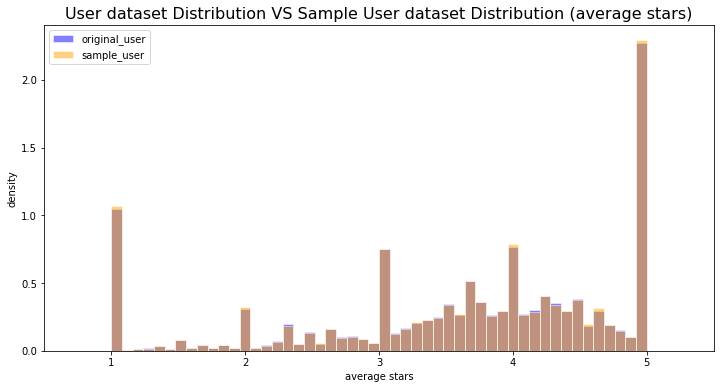

In [ ]:
# check sample distribution using a histogram 

fig, ax = plt.subplots(1,1,figsize=(12,6))

user_hist1 = user["average_stars"]
user_sample_hist1 = sample_user["average_stars"]

ax = plt.hist(x=user_hist1, bins=50, density = True, color = 'blue', ec = 'w', alpha = 0.5, label = 'original_user')
ax = plt.hist(x=user_sample_hist1, bins=50, density = True, color = 'orange', ec = 'w', alpha = 0.5, label = 'sample_user')
 
# plt.xlim([0, max(user_sample_hist)])
plt.xlim([0.5, 5.5])
plt.xlabel("average stars")
plt.ylabel("density")
plt.legend(loc = 'upper left')
plt.title('User dataset Distribution VS Sample User dataset Distribution (average stars)',fontsize=16)
plt.show()
 
fig.savefig('user_distribution1.png')
# plt.xlim([0, max(max(len_dist), max(len_test_dist))])


In [ ]:
# perform a ks test to check the distribution of the original data and sample data
scipy.stats.ks_2samp(user_hist1, user_sample_hist1)

KstestResult(statistic=0.0038378620052581525, pvalue=0.7751868999627998)

In [ ]:
# statistical description

user.describe().T

,count,mean,std,min,25%,50%,75%,max
review_count,1987897.0,23.394409,82.566992,0.0,2.0,5.00,17.00,17473.0
useful,1987897.0,42.296335,641.480597,0.0,0.0,3.00,13.00,206296.0
funny,1987897.0,16.970536,407.803437,0.0,0.0,0.00,2.00,185823.0
cool,1987897.0,23.792914,565.351295,0.0,0.0,0.00,3.00,199878.0
fans,1987897.0,1.465740,18.130753,0.0,0.0,0.00,0.00,12497.0
average_stars,1987897.0,3.630494,1.183337,1.0,3.0,3.88,4.56,5.0
compliment_hot,1987897.0,1.807072,73.601841,0.0,0.0,0.00,0.00,25784.0
compliment_more,1987897.0,0.292263,12.824667,0.0,0.0,0.00,0.00,13501.0
compliment_profile,1987897.0,0.179318,15.155253,0.0,0.0,0.00,0.00,14180.0
compliment_cute,1987897.0,0.133649,11.356823,0.0,0.0,0.00,0.00,13654.0


In [ ]:
# statistical description

sample_user.describe().T

,count,mean,std,min,25%,50%,75%,max
review_count,30000.0,22.547033,74.053152,1.0,2.0,5.00,16.00,3015.0
useful,30000.0,41.873100,642.674796,0.0,0.0,3.00,13.00,80394.0
funny,30000.0,16.908267,345.043971,0.0,0.0,0.00,2.00,34865.0
cool,30000.0,24.090000,588.580397,0.0,0.0,0.00,3.00,78116.0
fans,30000.0,1.452133,18.186453,0.0,0.0,0.00,0.00,2172.0
average_stars,30000.0,3.631549,1.188303,1.0,3.0,3.88,4.57,5.0
compliment_hot,30000.0,2.033100,57.826175,0.0,0.0,0.00,0.00,5451.0
compliment_more,30000.0,0.279333,4.830357,0.0,0.0,0.00,0.00,469.0
compliment_profile,30000.0,0.152333,3.654136,0.0,0.0,0.00,0.00,392.0
compliment_cute,30000.0,0.140533,3.976185,0.0,0.0,0.00,0.00,369.0


In [ ]:
user_review_sample = pd.merge(sample_user, sample_review, on = 'user_id')

In [ ]:
user_review_sample.head()

,user_id,name,review_count,yelping_since,useful_x,funny_x,cool_x,elite,friends,fans,...,compliment_writer,compliment_photos,review_id,business_id,stars,useful_y,funny_y,cool_y,text,date
0,dJcydaBlE5E98XPqACmrsg,Najwa,22,2018-03-27 00:21:44,8,0,4,,G0Ex17NeMJUwqNIl8Z4ecw,1,...,0,0,1SLFL1pSG206Y06Hn0nnqg,FpyjR9TiaO3JyynpF-y-7g,4.0,1,0,0,We wanted to try all the wings!!! The menu opt...,2018-04-23 16:34:44
1,gGm0pvGD4T95dF51Ph9fTg,Nicole,13,2016-09-12 19:02:54,7,1,0,,"OMqnqgoUl7ZRsuw96nvoMg, JclxIH0M2LGSMEN_SY_eZw...",1,...,0,0,9lC14tws_pDZ-3oSUuJVmw,0d1dpaZqcm7litFOJl7atA,5.0,0,0,0,This place is reasonably priced and very trend...,2018-12-28 02:45:38
2,APsf8UHcyM4a2FzOCIJWPA,Erin,4,2015-02-20 21:28:42,1,0,1,,None,0,...,0,0,2Bn12rh5X8dgAYrGRj9uuQ,OhTknUVRxFU8YbaiWZkG3w,5.0,0,0,0,Absolutely the best pizza in Glenside! I've h...,2015-04-10 13:39:04
3,Km-DrAz45rD6b3GzDQ6dxA,Jeff,7,2013-01-09 14:31:26,3,0,0,,None,0,...,0,0,FQOechSYkHIKFoIOsxbrkw,ZlAkflZPVrWKjcbAOYXzyQ,1.0,3,0,0,This was the absolute WORST customer service I...,2015-04-17 00:18:14
4,j-B00rO0bM87_F3NnlqJXg,Gloria,168,2013-07-17 00:38:16,155,30,52,"2014,2015,2018,2021","qryJXz_026UC5nQJLJiijw, 0v9ouDw3jLW4dAt9Z60dWg...",6,...,4,1,SLUNokvq6xtDN2h0BgmK1Q,H9fkf4Xkj_j7Zxs1FmY58Q,4.0,1,1,0,I tried Plaza Azteca on the recommendation of ...,2014-11-18 14:43:57


In [ ]:
user_review_sample.shape

(467, 30)